In [0]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Upload the data file into Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv
Saving minisom.py to minisom.py
User uploaded file "Credit_Card_Applications.csv" with length 35641 bytes
User uploaded file "minisom.py" with length 10989 bytes


In [5]:
#Import the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [0]:
#Create subsets of data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values #We are not goign to use this. This is just to distinguish between the customers who are approved and who are not.

In [7]:
print(X[0:5])

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 1.1460000e+01 2.0000000e+00
  4.0000000e+00 4.0000000e+00 1.5850000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 7.0000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 1.6500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 1.7500000e+00 1.0000000e+00
  4.0000000e+00 4.0000000e+00 1.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5687688e+07 0.0000000e+00 2.1670000e+01 1.1500000e+01 1.0000000e+00
  5.0000000e+00 3.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.1000000e+01 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5715750e+07 1.0000000e+00 2.0170000e+01 8.1700000e+00 2.0000000e+00
  6.0000000e+00 4.0000000e+00 1.9600000e+00 1.0000000e+00 1.

In [8]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X[0:5]

array([[0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
        0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.05      , 0.01212   ],
       [0.69609056, 0.        , 0.13413534, 0.25      , 0.5       ,
        0.53846154, 0.375     , 0.00578947, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.08      , 0.        ],
       [0.38898166, 0.        , 0.23804511, 0.0625    , 0.        ,
        0.23076923, 0.375     , 0.04385965, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.14      , 0.        ],
       [0.48842545, 0.        , 0.11909774, 0.41071429, 0.        ,
        0.30769231, 0.25      , 0.        , 1.        , 1.        ,
        0.1641791 , 1.        , 0.5       , 0.        , 0.        ],
       [0.60079526, 1.        , 0.09654135, 0.29178571, 0.5       ,
        0.38461538, 0.375     , 0.06877193, 1.        , 1.        ,
        0.20895522, 0.        , 0.5       , 

In [0]:
#Initializing the SOM
from minisom import MiniSom
som = MiniSom(10, 10, 15, 1.0, 0.5)

In [0]:
#Initialize weights and train the SOM
som.random_weights_init(X)
som.train_random(X, 100)

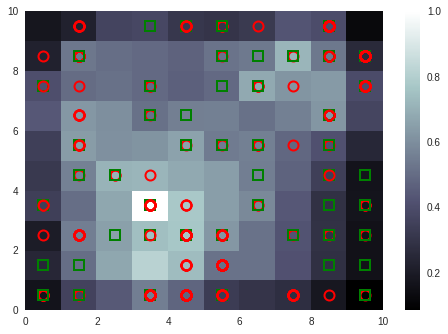

In [15]:
#Plot the SOM
from pylab import bone, pcolor, colorbar, plot, show
bone() #initialize the map window
pcolor(som.distance_map().T) #Take transpose of MID matrix and color plot of the map
colorbar() #gives legend of all the colors
markers = ['o','s'] #add markers
colors = ['r', 'g'] #red squares did not get approval, green circles got approval
#loop through each customer and mark the fraudsters
for i, x in enumerate(X): #i indicates all indexes of customers and X is all vectors of customers
  w = som.winner(x) #get the winning node
  plot(w[0] + 0.5,
       w[1] + 0.5,
      markers[y[i]],
      markeredgecolor = colors[y[i]],
      markerfacecolor = 'None',
      markersize = 10,
      markeredgewidth = 2) #plot the color marker in the center of the winning node
show()

In [16]:
#Get the mappings
mappings = som.win_map(X) #returns a dictionary of all the mappings from winning nodes to customers
mappings

defaultdict(list,
            {(0,
              0): [array([0.0989873 , 0.        , 0.16917293, 0.03125   , 0.5       ,
                     1.        , 0.875     , 0.03649123, 1.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.08      , 0.0586    ]), array([0.00850922, 0.        , 0.22300752, 0.12642857, 0.5       ,
                     0.15384615, 0.5       , 0.01754386, 1.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.0855    , 0.        ]), array([4.21657076e-01, 0.00000000e+00, 1.74135338e-01, 7.44642857e-02,
                     5.00000000e-01, 5.38461538e-01, 8.75000000e-01, 9.64912281e-02,
                     1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 1.80000000e-01, 1.00000000e-05]), array([0.0555362 , 0.        , 0.17037594, 0.09071429, 0.        ,
                     0.38461538, 0.375     , 0.00877193, 1.        , 0.        ,
                     0. 

In [17]:
#Finding the frauds
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds

array([[8.35097245e-01, 1.00000000e+00, 2.33082707e-01, 5.28214286e-01,
        5.00000000e-01, 3.84615385e-01, 3.75000000e-01, 1.76842105e-01,
        1.00000000e+00, 1.00000000e+00, 7.46268657e-02, 1.00000000e+00,
        5.00000000e-01, 8.40000000e-02, 0.00000000e+00],
       [6.06060970e-01, 1.00000000e+00, 9.65413534e-02, 3.30357143e-01,
        5.00000000e-01, 5.38461538e-01, 3.75000000e-01, 5.84210526e-02,
        1.00000000e+00, 1.00000000e+00, 4.47761194e-02, 1.00000000e+00,
        5.00000000e-01, 2.00000000e-02, 2.80000000e-04],
       [8.80918916e-01, 1.00000000e+00, 6.87969925e-01, 9.82142857e-02,
        5.00000000e-01, 6.15384615e-01, 3.75000000e-01, 6.14035088e-02,
        1.00000000e+00, 1.00000000e+00, 7.46268657e-02, 1.00000000e+00,
        5.00000000e-01, 3.00000000e-02, 5.80000000e-04],
       [6.08319418e-01, 0.00000000e+00, 1.71729323e-01, 1.02678571e-01,
        5.00000000e-01, 1.00000000e+00, 8.75000000e-01, 3.07017544e-02,
        1.00000000e+00, 0.00000000e+0

In [18]:
#Inverse scaling to get fraud customers list
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5774262e+07, 1.0000000e+00, 2.9250000e+01, 1.4790000e+01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.0400000e+00,
        1.0000000e+00, 1.0000000e+00, 5.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6800000e+02, 1.0000000e+00],
       [1.5717065e+07, 1.0000000e+00, 2.0170000e+01, 9.2500000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6650000e+00,
        1.0000000e+00, 1.0000000e+00, 3.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 4.0000000e+01, 2.9000000e+01],
       [1.5785705e+07, 1.0000000e+00, 5.9500000e+01, 2.7500000e+00,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 1.7500000e+00,
        1.0000000e+00, 1.0000000e+00, 5.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 6.0000000e+01, 5.9000000e+01],
       [1.5717629e+07, 0.0000000e+00, 2.5170000e+01, 2.8750000e+00,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 8.7500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,